## Programmme to check whether patient has diabetes based on diagnostic measures 

### Importing essential packages needed for this project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
import missingno as msno
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

Using TensorFlow backend.


# Reading the dataset 

In [2]:
data=pd.read_csv('pima.csv',header=None,names= [ "NumTimesPrg", "PlGlcConc", "BloodP","SkinThick", "TwoHourSerIns", "BMI","DiPedFunc", "Age", "HasDiabetes"])

In [3]:
data.columns

Index(['NumTimesPrg', 'PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns',
       'BMI', 'DiPedFunc', 'Age', 'HasDiabetes'],
      dtype='object')

In [4]:
data.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print('The information for the pima indians diabetics dataset are')
data.info()


The information for the pima indians diabetics dataset are
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
NumTimesPrg      768 non-null int64
PlGlcConc        768 non-null int64
BloodP           768 non-null int64
SkinThick        768 non-null int64
TwoHourSerIns    768 non-null int64
BMI              768 non-null float64
DiPedFunc        768 non-null float64
Age              768 non-null int64
HasDiabetes      768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print(f'The Total Number of Columns and Rows in Pima-Indians-Dataset is {data.shape}')

The Total Number of Columns and Rows in Pima-Indians-Dataset is (768, 9)


In [8]:
print('The relationship between different columns are in numerical format aregiven by correalation matrices') 
corr=data.corr()
corr

The relationship between different columns are in numerical format aregiven by correalation matrices


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


The relationship between different columns are given by heatmap plot


Text(0.5, 1, 'Correlation Heapmap')

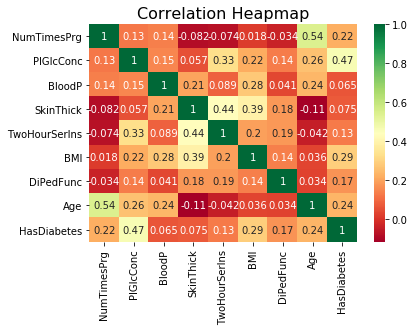

In [9]:
print('The relationship between different columns are given by heatmap plot')
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.title('Correlation Heapmap',fontsize=16)

In [10]:
print('The total number of missing values are ')
data.isnull().sum()

The total number of missing values are 


NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

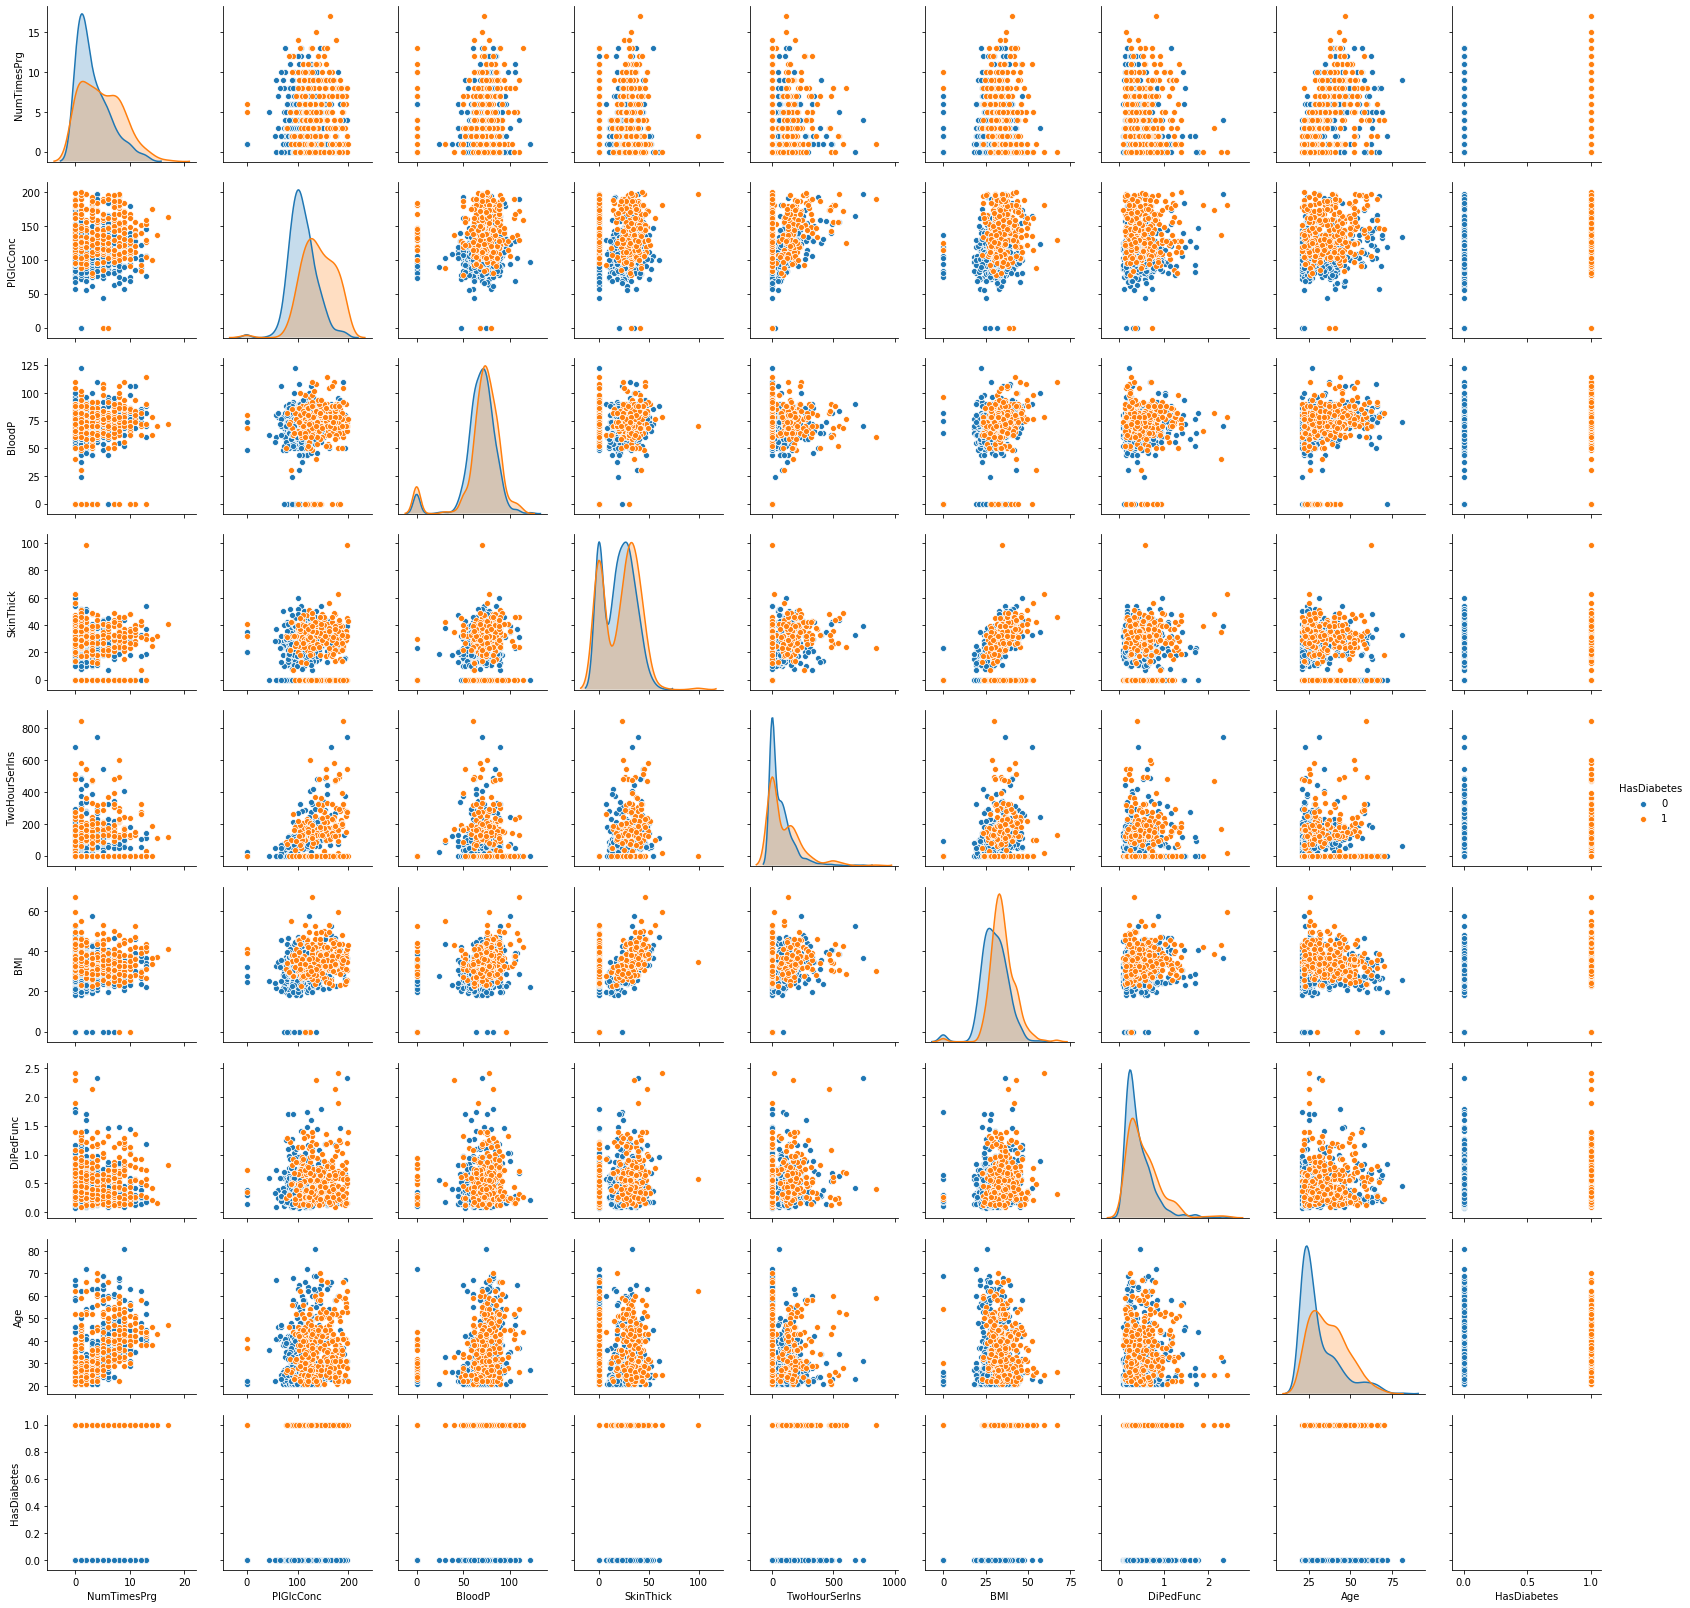

In [11]:
sns.pairplot(data,hue='HasDiabetes')

The histogram for different columns are given by


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3F5DD2B08>,
      dtype=object)

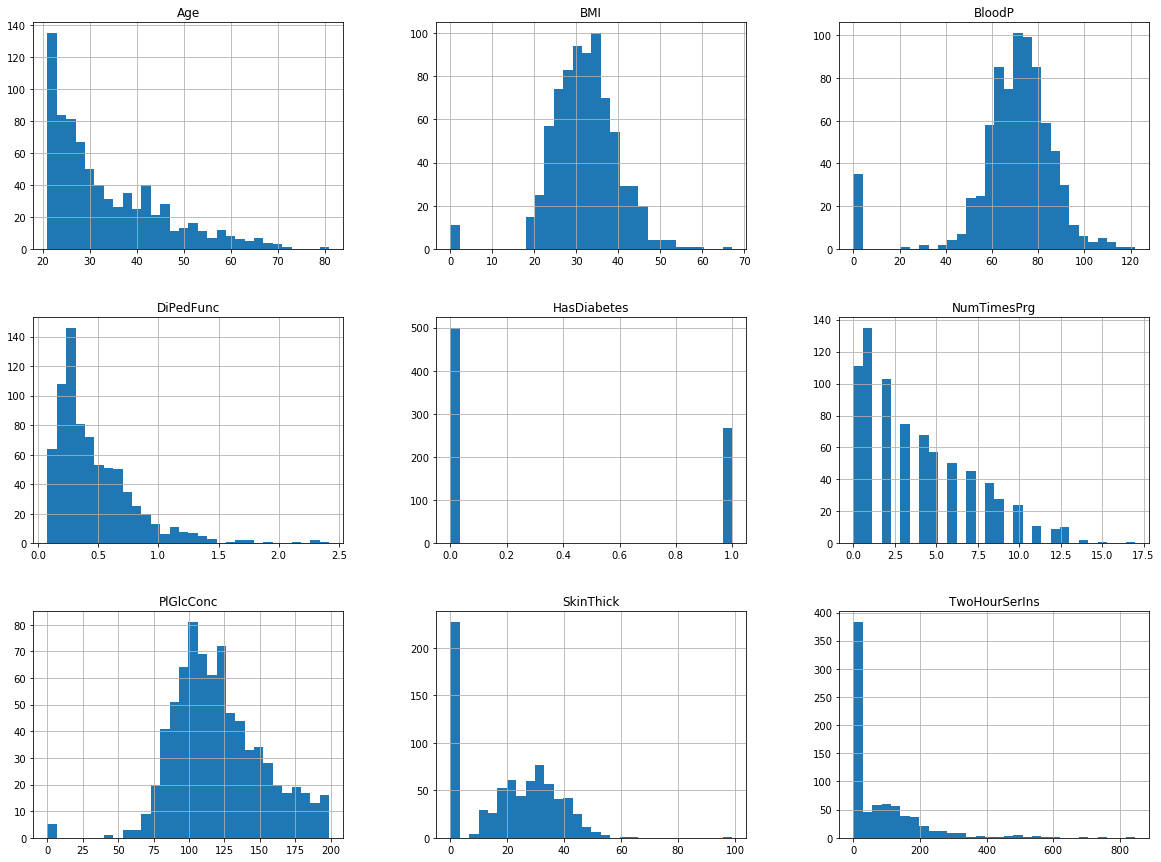

In [12]:
print('The histogram for different columns are given by')
data.hist(bins=30,figsize=(20,15))

In [13]:
y=data['HasDiabetes']
X=data.drop('HasDiabetes',axis=1)

In [14]:
sd=StandardScaler()
X=sd.fit_transform(X)

In [15]:
X=pd.DataFrame(X,columns=[ "NumTimesPrg", "PlGlcConc", "BloodP","SkinThick", "TwoHourSerIns", "BMI","DiPedFunc", "Age"])

In [16]:
X.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Dividing the dataset for training and testing

In [17]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.333,random_state=5)

In [18]:
X_train.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age
525,-0.250952,-1.060802,-0.470732,-0.159107,-0.692891,-1.293634,-0.084190,-1.041549
68,-0.844885,-0.810425,-0.160546,-0.472747,-0.362941,-1.572857,-0.416403,-0.701198
267,-0.547919,0.222381,-0.263941,1.346366,-0.692891,1.016296,1.900028,-0.786286
553,-0.844885,-1.029505,-0.367337,0.217261,-0.310843,-0.265588,-0.150632,-0.871374
614,2.124780,0.535352,0.253036,0.342717,0.557446,0.521311,0.257084,1.425995


In [19]:
y_train

525    0
68     0
267    0
553    0
614    1
      ..
73     0
400    1
118    0
701    1
206    1
Name: HasDiabetes, Length: 512, dtype: int64

### Training and predicting using Logistic Regression

In [20]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
acc=cross_val_score(estimator=LR,X=X_train,y=y_train,cv=10)
print(f'Test accuracy of Logistic Regression{LR.score(X_test,y_test)}')

Test accuracy of Logistic Regression0.77734375


Text(33.0, 0.5, 'Actual Label')

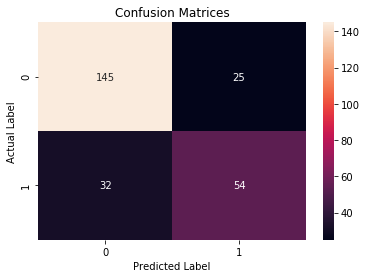

In [21]:
c=confusion_matrix(y_pred,y_test)
sns.heatmap(c,annot=True,fmt='g')
plt.title('Confusion Matrices')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

### Training and predicting using K Neighbours Classifier

In [22]:
test_scores=[]
train_scores=[]
for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [23]:

train_ind=[i for i,v in enumerate(train_scores) if v ==max(train_scores)]
print(f'Maximum train score for KNeighbours Classifier for pima indians diabetics dataset is {max(train_scores*100)} and index for this value is {train_ind}')

Maximum train score for KNeighbours Classifier for pima indians diabetics dataset is 1.0 and index for this value is [0]


In [24]:
test_scores

[0.7109375,
 0.71875,
 0.72265625,
 0.7109375,
 0.69140625,
 0.6953125,
 0.69140625,
 0.71875,
 0.71875,
 0.75,
 0.7109375,
 0.74609375,
 0.73046875,
 0.73828125]

In [25]:

test_ind=[i for i,v in enumerate(test_scores) if v ==max(test_scores)]
print(f'Maximum train score for KNeighbours Classifier for pima indians diabetics dataset is {max(test_scores*100)} and index for this value is {test_ind}')

Maximum train score for KNeighbours Classifier for pima indians diabetics dataset is 0.75 and index for this value is [9]


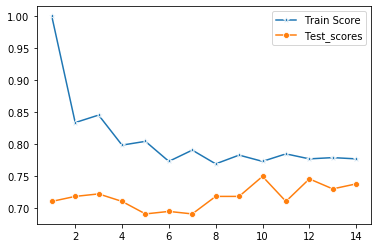

In [26]:
sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
sns.lineplot(range(1,15),test_scores,marker='o',label='Test_scores')

In [27]:
y_pred=knn.predict(X_test)
conf=confusion_matrix(y_test,y_pred)
conf

array([[145,  32],
       [ 35,  44]], dtype=int64)

In [28]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,145,32,177
1,35,44,79
All,180,76,256


Text(33.0, 0.5, 'Actual Label')

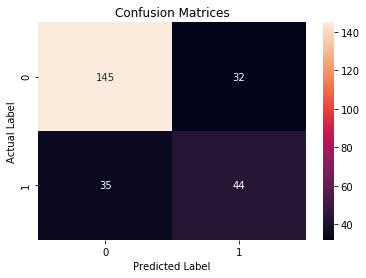

In [29]:
sns.heatmap(pd.DataFrame(conf),annot=True,fmt='g')
plt.title('Confusion Matrices')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [30]:
cls=classification_report (y_test,y_pred)
print(cls)


              precision    recall  f1-score   support

           0       0.81      0.82      0.81       177
           1       0.58      0.56      0.57        79

   micro avg       0.74      0.74      0.74       256
   macro avg       0.69      0.69      0.69       256
weighted avg       0.74      0.74      0.74       256



In [31]:
y_predict_proba=knn.predict_proba(X_test)[:,1]

In [32]:
fpr,tpr,thresholds=roc_curve(y_test,y_predict_proba)

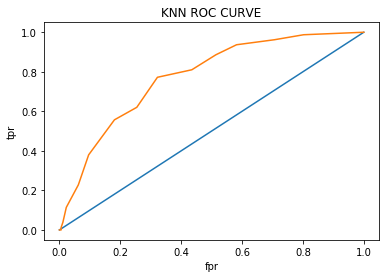

In [33]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC CURVE')
plt.show()

## Predicting and training dataset for future prediction using Keras API

In [34]:
classifier=Sequential()
classifier.add(Dense(4,activation='relu',input_dim=8))
classifier.add(Dense(4,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
512/512 [==============================] - 5s 9ms/step - loss: 0.7302 - accuracy: 0.3711
Epoch 2/100
512/512 [==============================] - 0s 286us/step - loss: 0.7031 - accuracy: 0.4922
Epoch 3/100
512/512 [==============================] - 0s 266us/step - loss: 0.6882 - accuracy: 0.5762
Epoch 4/100
512/512 [==============================] - 0s 281us/step - loss: 0.6783 - accuracy: 0.6172
Epoch 5/100
512/512 [==============================] - 0s 299us/step - loss: 0.6711 - accuracy: 0.6309
Epoch 6/100
512/512 [==============================] - 0s 268us/step - loss: 0.6644 - accuracy: 0.6309
Epoch 7/100
512/512 [==============================] - 0s 268us/step - loss: 0.6566 - accuracy: 0.6309
Epoch 8/100
512/512 [==============================] - 0s 272us/step - loss: 0.6486 - accuracy: 0.6309
Epoch 9/100
512/512 [==============================] - 0s 271us/step - loss: 0.6383 - accuracy: 0.6309
Epoch 10/100
512/512 [==============================] - 0s 259us/step - los

512/512 [==============================] - 0s 270us/step - loss: 0.4528 - accuracy: 0.7676
Epoch 80/100
512/512 [==============================] - 0s 273us/step - loss: 0.4521 - accuracy: 0.7656
Epoch 81/100
512/512 [==============================] - 0s 287us/step - loss: 0.4522 - accuracy: 0.7695
Epoch 82/100
512/512 [==============================] - 0s 291us/step - loss: 0.4520 - accuracy: 0.7637
Epoch 83/100
512/512 [==============================] - 0s 299us/step - loss: 0.4516 - accuracy: 0.7637
Epoch 84/100
512/512 [==============================] - 0s 273us/step - loss: 0.4518 - accuracy: 0.7676
Epoch 85/100
512/512 [==============================] - 0s 279us/step - loss: 0.4514 - accuracy: 0.7656
Epoch 86/100
512/512 [==============================] - 0s 268us/step - loss: 0.4512 - accuracy: 0.7656
Epoch 87/100
512/512 [==============================] - 0s 321us/step - loss: 0.4507 - accuracy: 0.7656
Epoch 88/100
512/512 [==============================] - 0s 325us/step - loss:

In [35]:
classifier.evaluate(X_train,y_train)

512/512 [==============================] - 0s 117us/step


[0.44703630171716213, 0.767578125]

In [36]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [37]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[135,  42],
       [ 21,  58]], dtype=int64)